In [1]:
import torch
from PIL import Image
import random
import os
from torchvision import transforms
from timm.data.transforms import str_to_interp_mode
import numpy as np
import sys
sys.path.append("..")

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
import timm

In [3]:
# cementation_fissures crack longitudinal_crack loose massive_crack mending normal transverse_crack
class_map = ['cementation_fissures','crack', 'longitudinal_crack', 'loose', 'massive_crack', 'mending', 'normal', 'transverse_crack']
class_name = 'normal'
root_dir = '/home/tangwenhao/dataset/pdc/cqu_bpdd/data/test'
_dir = os.path.join(root_dir,class_name)
for root,dirs,files in os.walk(_dir):
    num_pic = len(files)

In [4]:
from config import get_config, _update_config_from_file
config=get_config(None)
_update_config_from_file(config, '../configs/pdc/baseline/effi_b3_bin.yaml')
_update_config_from_file(config, '../configs/pdc/stn_effi_b3.yaml')

=> merge config from ../configs/pdc/baseline/effi_b3_bin.yaml
=> merge config from ../configs/pdc/stn_effi_b3.yaml


In [5]:
from models import build_model
model = build_model(config)['main']
cpt = torch.load('/data/tangwenhao/output/wsplin/model/stn_1_bn_stn_1_bn_det_main_btml.pth', map_location='cpu')

In [7]:
model.load_state_dict(cpt['state_dict'], strict=True)
# model.head_instance.load_state_dict(ins)

<All keys matched successfully>

In [10]:
_file = random.randint(0, num_pic)
img = Image.open(os.path.join(_dir,str(_file)+'.jpg')).convert('RGB')

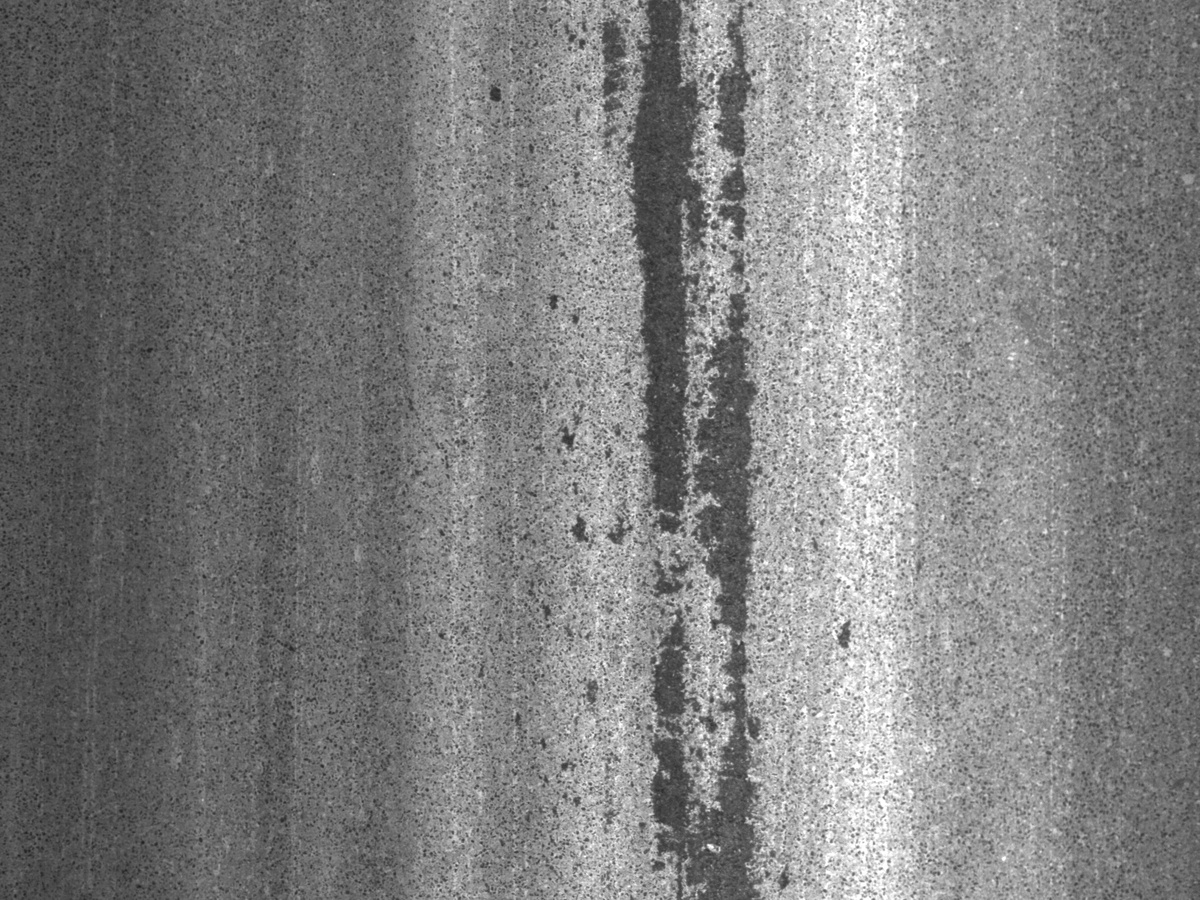

In [11]:
img

In [12]:
imgs = transforms.Resize(size=(300,300),interpolation=str_to_interp_mode('bicubic'))(img=img)
imgs = transforms.ToTensor()(imgs)
imgs = transforms.Normalize(mean=torch.tensor((0.5, 0.5, 0.5)),std=torch.tensor((0.5, 0.5, 0.5)))(imgs)
imgs = imgs.unsqueeze(0)

In [15]:
def convert_image_np(inp):
    """Convert a Tensor to numpy image."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.5*255, 0.5*255, 0.5*255])
    std = np.array([0.5*255, 0.5*255, 0.5*255])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    return np.array(inp,dtype='uint8')

In [13]:
model.eval()
with torch.no_grad():
    stn_x = model.stn(imgs)
    output = model(imgs)
output

/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:4255: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:4193: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


In [18]:
output

tensor([[ 1.3523, -1.1478]])

In [86]:
stn_x[1]

tensor([[[[ 1.5271, -1.7685],
          [ 1.5282, -1.7597],
          [ 1.5293, -1.7510],
          ...,
          [ 1.8534,  0.8232],
          [ 1.8545,  0.8319],
          [ 1.8556,  0.8407]],

         [[ 1.5130, -1.7700],
          [ 1.5141, -1.7613],
          [ 1.5152, -1.7526],
          ...,
          [ 1.8393,  0.8217],
          [ 1.8404,  0.8304],
          [ 1.8415,  0.8391]],

         [[ 1.4989, -1.7716],
          [ 1.5000, -1.7628],
          [ 1.5011, -1.7541],
          ...,
          [ 1.8252,  0.8201],
          [ 1.8263,  0.8288],
          [ 1.8274,  0.8376]],

         ...,

         [[-2.6633, -2.2265],
          [-2.6622, -2.2178],
          [-2.6611, -2.2090],
          ...,
          [-2.3370,  0.3652],
          [-2.3359,  0.3739],
          [-2.3348,  0.3827]],

         [[-2.6774, -2.2280],
          [-2.6763, -2.2193],
          [-2.6752, -2.2106],
          ...,
          [-2.3511,  0.3637],
          [-2.3500,  0.3724],
          [-2.3489,  0.3811]],



In [16]:
stn_x = convert_image_np(stn_x[0][0])

In [55]:
stn_x

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       ...,

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)

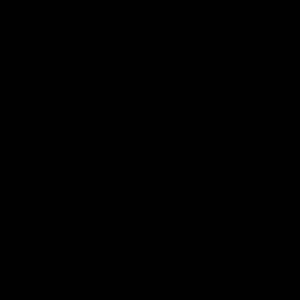

In [17]:
Image.fromarray(stn_x)

In [42]:
model.head_instance

Linear(in_features=768, out_features=8, bias=True)

In [47]:
model.head[0]

Linear(in_features=768, out_features=8, bias=True)

In [86]:
cluster_selected

tensor([[False,  True, False]])

In [87]:
scores

tensor([[0.8851, 0.6479, 0.8122]])

In [88]:
clusters_idcs[0]

tensor([1, 2, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0,
        0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 1, 2, 2, 2, 0, 1,
        1], device='cuda:0')

In [113]:
softmax=torch.nn.Softmax(-1)
bag_output = softmax(output[0])
inst_output = softmax(output[1])[0]
inst_max_output,inst_max_idic=torch.max(inst_output,dim=-1)

In [114]:
inst_output[:,2]

tensor([0.0799, 0.1216, 0.1577, 0.1756, 0.1493, 0.0775, 0.1594, 0.1741, 0.3664,
        0.5454, 0.5668, 0.5861, 0.1427, 0.1446, 0.2494, 0.4703, 0.4786, 0.5854,
        0.8039, 0.2323, 0.2037, 0.4135, 0.6310, 0.8112, 0.7712, 0.8273, 0.3027,
        0.2160, 0.3357, 0.6232, 0.8152, 0.7704, 0.8150, 0.2989, 0.1781, 0.1786,
        0.3311, 0.5595, 0.5296, 0.5026, 0.1652, 0.1287, 0.2245, 0.4188, 0.4316,
        0.3947, 0.5817, 0.1615, 0.2023])

In [115]:
# 128
from PIL import ImageDraw,ImageFont
img_d = transforms.Resize(size=(896,896),interpolation=str_to_interp_mode('bicubic'))(img=img)
draw = ImageDraw.Draw(img_d)
#font=ImageFont.truetype(size=10)
for i in range(0,len(inst_output)):
    row = int(i / 7)
    col = i % 7
    draw.text((col*128,row*128),class_map[inst_max_idic[i]][:4]+'  '+str(inst_max_output[i].item())[:4]+ '  '+str(clusters_idcs[0][i].item()),fill='red')

In [92]:
bag_output

tensor([[0.0109, 0.0128, 0.4581, 0.0051, 0.0632, 0.0138, 0.3521, 0.0840]])

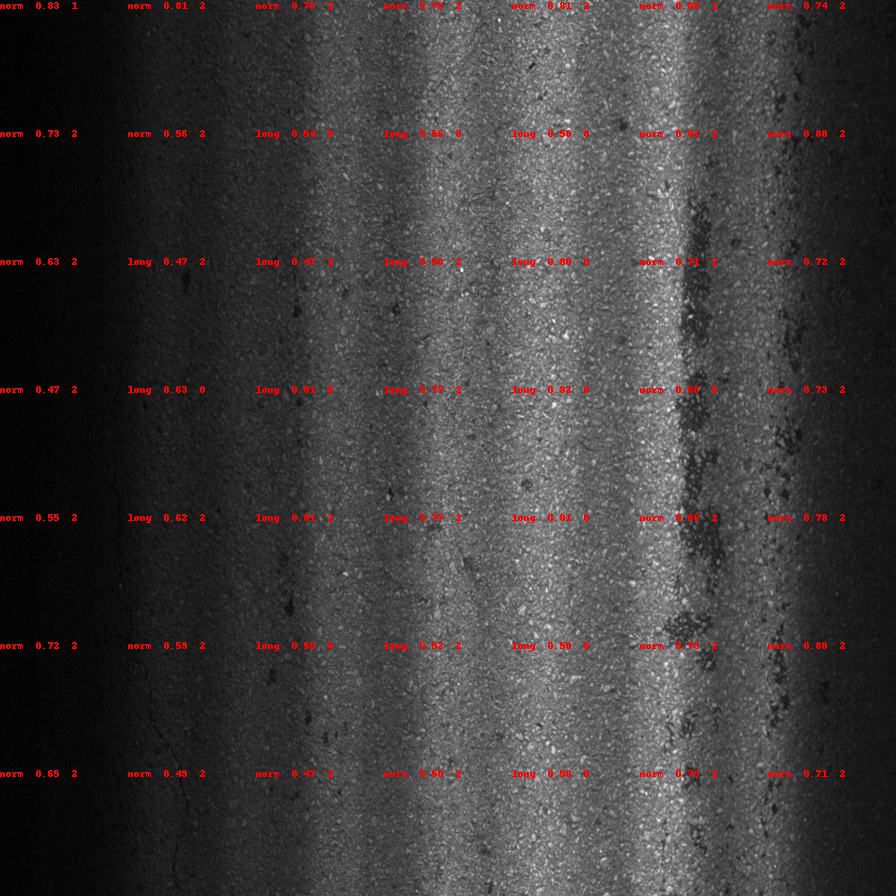

In [116]:
img_d.show()

## CAM

In [9]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
import cv2
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

In [26]:
config=get_config(None)
_update_config_from_file(config, '/home/tangwenhao/rdd_code/rdd_transformer/configs/baseline/rdd_swin_small.yaml')
from models import build_model
model_b = build_model(config)
cpt = torch.load('/home/tangwenhao/output/swin/model/swin_small_patch4_window7_224_ema_best_model.pth', map_location='cpu')
model_b.load_state_dict(cpt['state_dict'], strict=False)
_ = model_b.eval()

=> merge config from /home/tangwenhao/rdd_code/rdd_transformer/configs/baseline/rdd_swin_small.yaml


In [10]:
def reshape_transform(tensor, height=7, width=7):
    result = tensor.reshape(tensor.size(0),
        height, width, tensor.size(2))

    # Bring the channels to the first dimension,
    # like in CNNs.
    result = result.transpose(2, 3).transpose(1, 2)
    return result

In [52]:
with torch.no_grad():
    a = model_b(imgs)

In [53]:
softmax(a)

tensor([[2.2458e-04, 3.9289e-06, 9.9653e-01, 1.2876e-05, 2.6556e-03, 4.5395e-05,
         5.1652e-04, 1.5291e-05]])

In [108]:
target_layers = [model.instance_feature_extractor.layers[-1].blocks[-1].norm1]

In [121]:
target_layers = [model_b.layers[-1].blocks[-1].norm1]

In [122]:
cam = GradCAM(model=model_b, target_layers=target_layers, reshape_transform=reshape_transform)

In [119]:
cam = GradCAM(model=model, target_layers=target_layers, reshape_transform=reshape_transform)

In [123]:
target_category = [ClassifierOutputTarget(2)]
grayscale_cam = cam(input_tensor=imgs,
                    targets=target_category,)

In [124]:
# Here grayscale_cam has only one image in the batch
grayscale_cam = grayscale_cam[0, :]
rgb_img = cv2.resize(np.array(img), (224, 224))
rgb_img = np.float32(rgb_img) / 255
cam_image = show_cam_on_image(rgb_img, grayscale_cam,use_rgb=True)

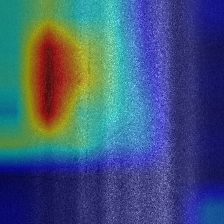

In [112]:
Image.fromarray(cam_image)

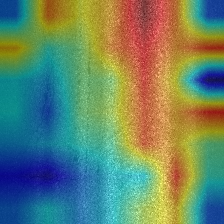

In [125]:
Image.fromarray(cam_image)

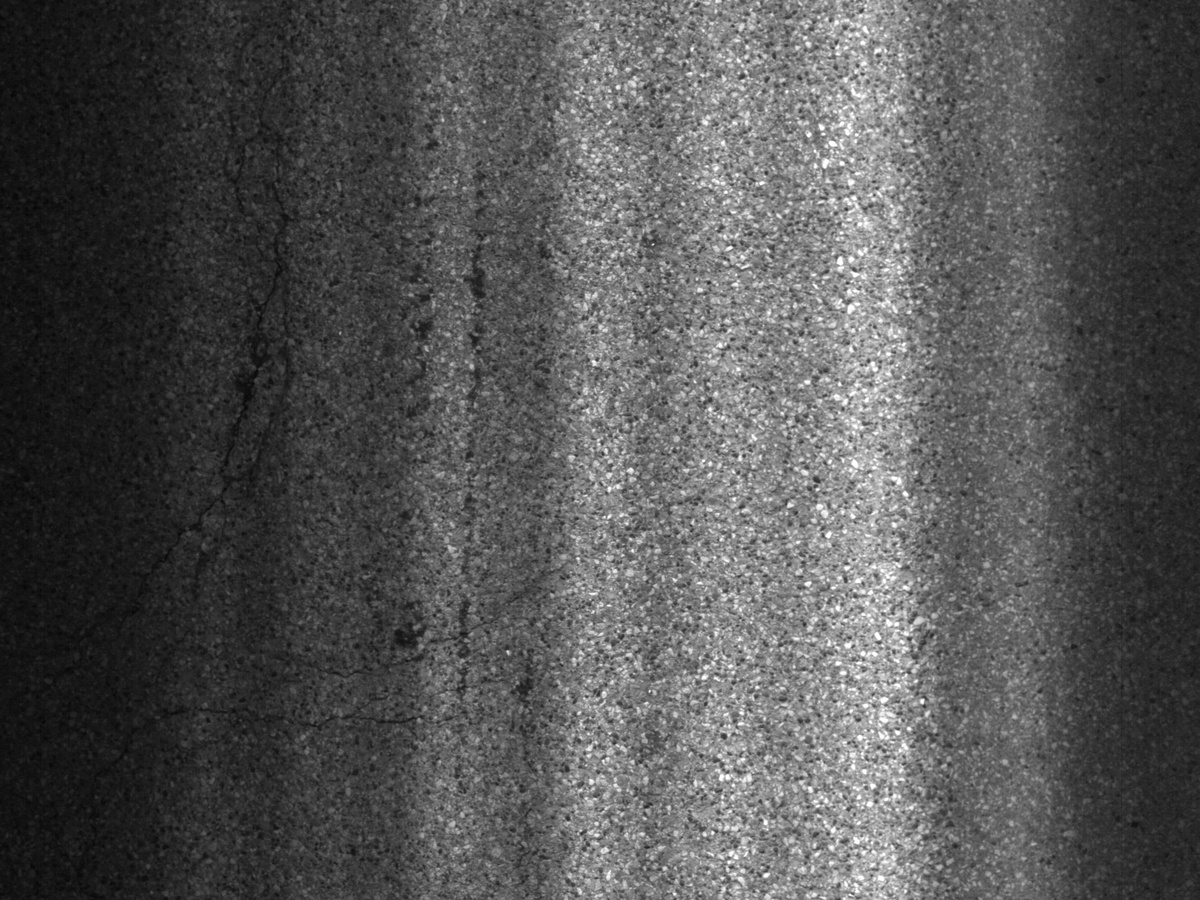

In [113]:
img